# Impossible "MU" Puzzle from Hofstadter's *Gödel, Escher, Bach* (1979)

In his 1979 book, Douglas Hofstadter presents a simple string rewriting system in which the reader is invited solve a puzzle using only four rules. The puzzle is impossible to solve with the rules given. The basic point is that given an axiom (a starting string) and some rules of inference (the string rewriting rules), some strings can never be arrived at. It's gently alluding to Gödel's first incompleteness theorem which states (loosely) that for any consistent formal system with rules of inference, there are statements inside the system that can never be proved using those rules of inference.

Nonetheless, as a brief Christmas holiday project, I was interested in exploring the kinds of results that could be arrived at in the MU puzzle; the "coverage" (what proportion of all possible strings are accessible via the rules); the sensitivity of the accessible results to the choice of axiom, etc. The rationalisation in terms of simple arithmetic is shown on the wikipedia page [here.](https://en.wikipedia.org/wiki/MU_puzzle)

The code in the module *mupuzzle.py* should be easily generalisable to describe general formal string-rewriting systems.

## The MU puzzle

As stated in the book, the puzzle goes as follows:

Starting with the string 'MI' (the axiom), try to arrive at the string 'MU' using only the following four rules:

RULES:
1.  xI ---> xIU   (for a string ending in 'I', you can add 'U')
2.  Mx ---> Mxx   (for any string {the whole string, not substrings} that looks like 'M(something)', you can change it to 'M(something)(something)')
3.  xIIIy ---> xUy   (for any instance of 'III', you can replace it with a 'U') 
4.  xUUy ---> xy   (for any instance of 'UU', you can drop it)

examples:

- 'MIIIIU' ---> 'MIUU' using rule 3 at index 2
- 'MUI' ---> 'MUIUI' using rule 2


# Brief exploration of the MU puzzle with a couple of axioms

## With 'MI' axiom:

In [1]:
from mupuzzle import muPuzzle

Create an example instance of the ````mupuzzle```` class with ````axiom```` being the only instance variable:

In [2]:
example = muPuzzle(axiom='MI')

Rule one can be applied to the axiom 'MI' because it ends in 'I'

In [3]:
example.rule_one_possible(example.axiom)

True

Rule three can be not applied to the axiom 'MI' because it does not contain 'III':

In [4]:
example.rule_three_possible(example.axiom)

False

The available options for the first rule starting with the axiom 'MI' are obtained using ````get_options()```` method. The resultant strings are the dict keys, and the rules are the dict values.

In [5]:
example.get_options(example.axiom)

{'MIU': '1', 'MII': '2'}

Apply the available rules up to ````num_steps```` times in a row to take a random walk through the network of possible strings:

In [6]:
example.random_walk(num_steps=3)

{'rules': [None, '2', '1', '2'], 'strings': ['MI', 'MII', 'MIIU', 'MIIUIIU']}

The ````discover_local_network()```` method uses a brute-force approach to find all reachable strings in a given maximum number of steps. It outputs a dictionary with the strings (nodes), string-pairs (edges) with the associated rules.

In [7]:
network = example.discover_local_network(num_steps=3)
network

{'nodes': {'MI',
  'MII',
  'MIIII',
  'MIIIIIIII',
  'MIIIIU',
  'MIIU',
  'MIIUIIU',
  'MIU',
  'MIUIU',
  'MIUIUIUIU',
  'MUI'},
 'edges': {('MI', 'MIU'): '1',
  ('MI', 'MII'): '2',
  ('MII', 'MIIU'): '1',
  ('MII', 'MIIII'): '2',
  ('MIU', 'MIUIU'): '2',
  ('MIIII', 'MIIIIU'): '1',
  ('MIIII', 'MIIIIIIII'): '2',
  ('MIIII', 'MUI'): '3i1',
  ('MIIII', 'MIU'): '3i2',
  ('MIUIU', 'MIUIUIUIU'): '2',
  ('MIIU', 'MIIUIIU'): '2'}}

The discovered network can be plotted by creating a graph object using pygraphviz. The node labels show the strings, and the edge labels show the rules joining the strings. Rule 3 can be sometimes be applied at a choice of different indices. e.g. 'MIIII' ---> 'MIU' is labelled 3i2, 'MIIII' ---> 'MUI' is labelled 3i1. 

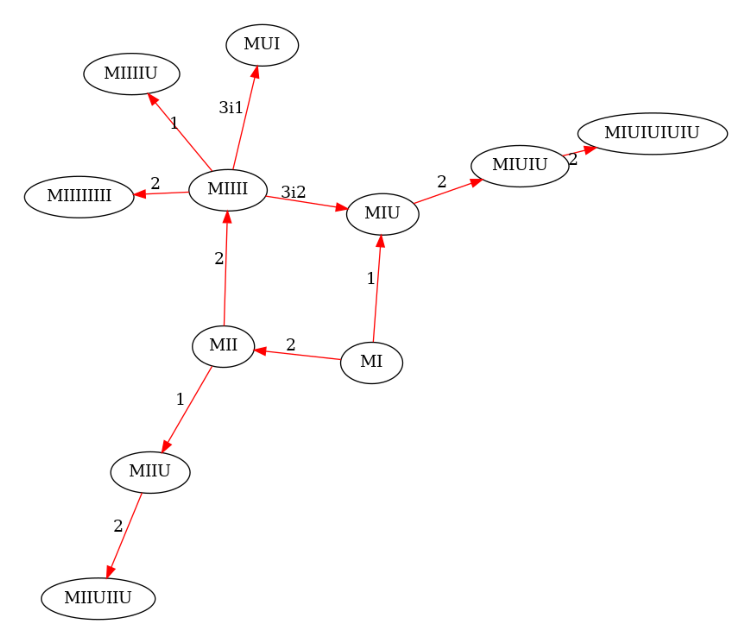

In [8]:
import pygraphviz as pgv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def plot_network(network, dpi=200):
    
    """
    Returns an image showing the graph of the network found by discover_local_network().
    """

    plt.rcParams['figure.dpi'] = dpi
    
    graph = pgv.AGraph(directed=True, overlap='false', splines='true')
    
    for node in network['nodes']:
        graph.add_node(node)
    
    for edge in network['edges'].items():
        graph.add_edge(edge[0], label=edge[1], color='red')
    
    graph.layout(prog='neato')  #neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, sfdp
    graph.draw('graph.png')
    img = mpimg.imread('graph.png')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    
plot_network(network)

The ````mupuzzle```` class only has one attribute (the axiom) so a new network can just be generated from the same ````example```` instance:

(WARNING: ````discover_local_network()```` scales poorly beyond ````num_steps=6```` for this particular network. Experiment carefully)

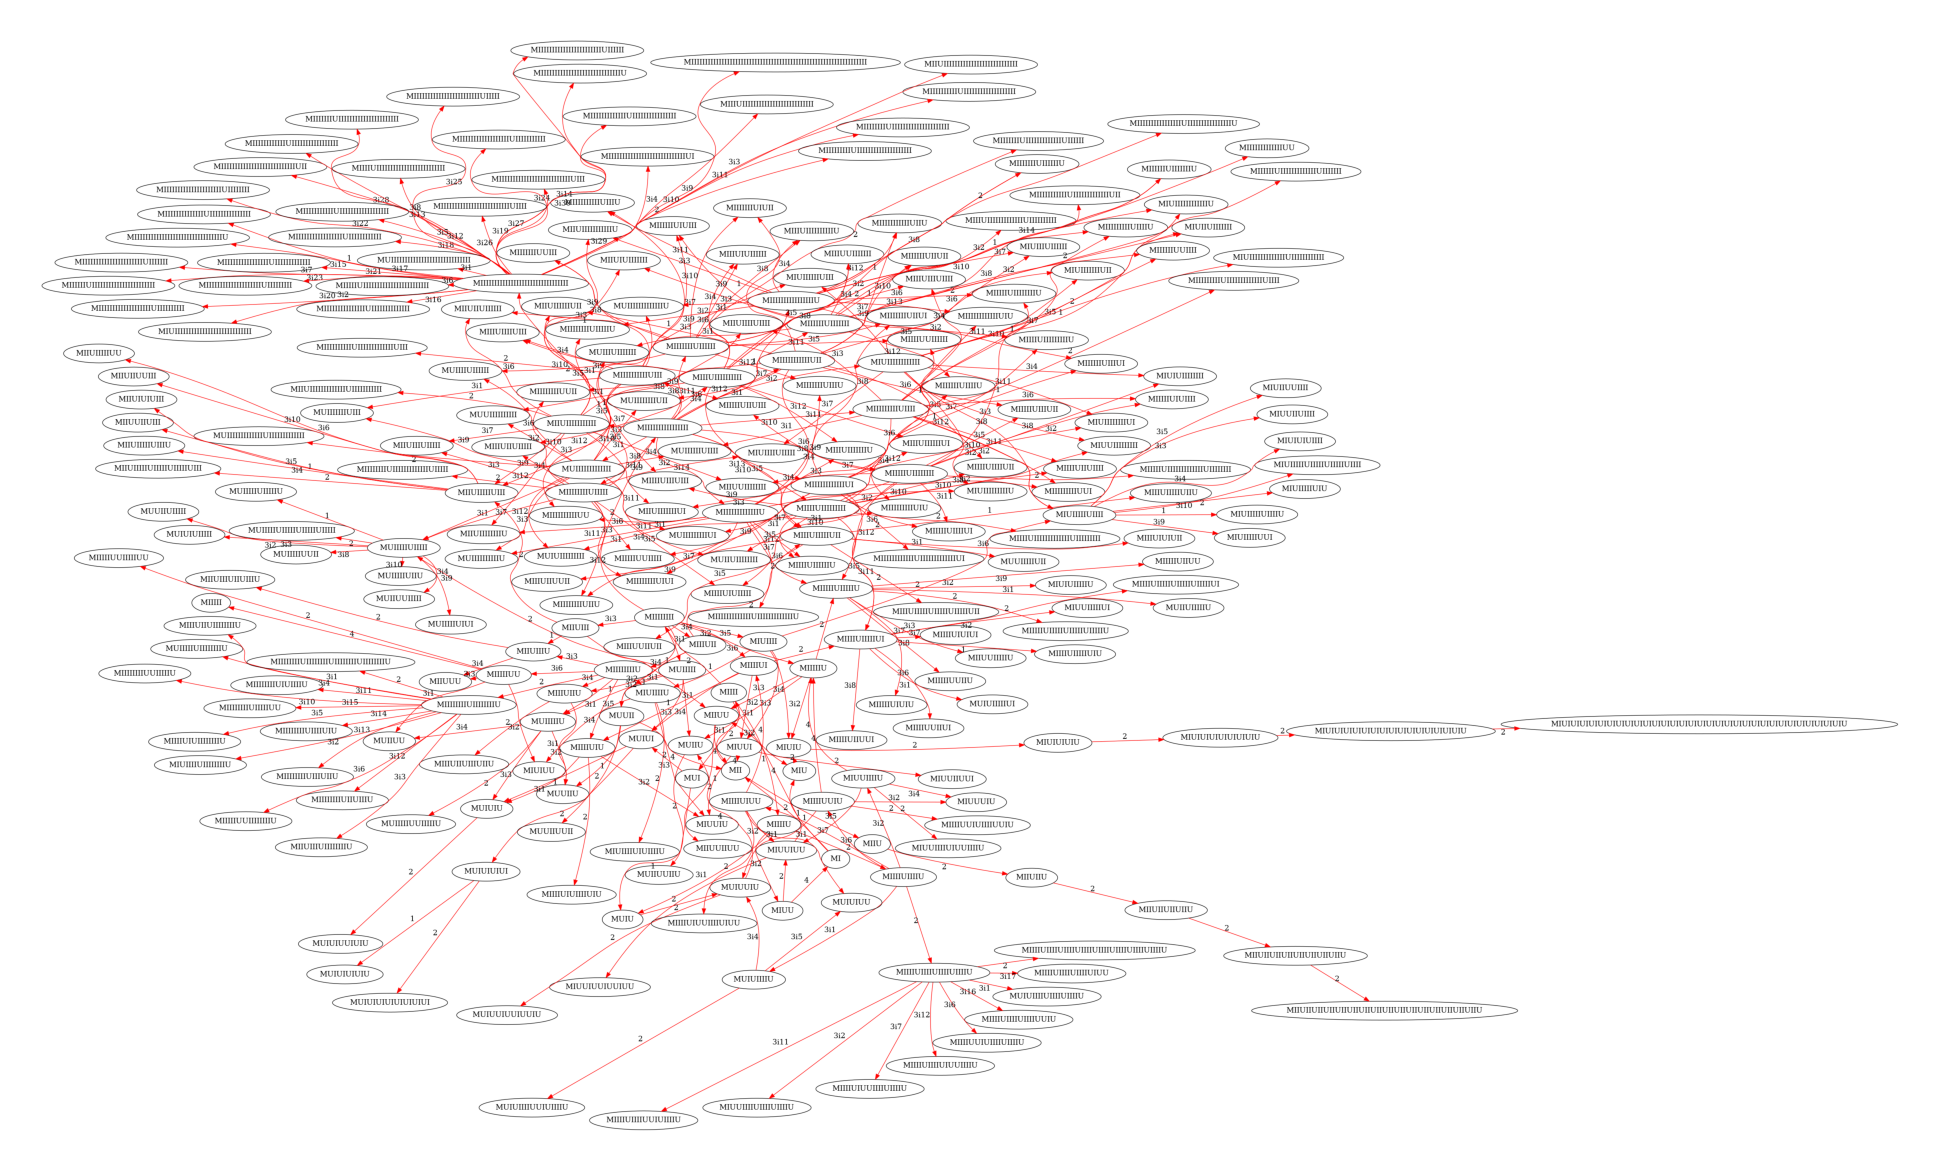

In [9]:
network = example.discover_local_network(num_steps=6)
plot_network(network, dpi=400)

Sanity-check to make sure the impossible solution 'MU' has not been found:

In [10]:
'MU' not in network['nodes']

True

## Axiom 'MU'

In [11]:
example2 = muPuzzle(axiom='MU')

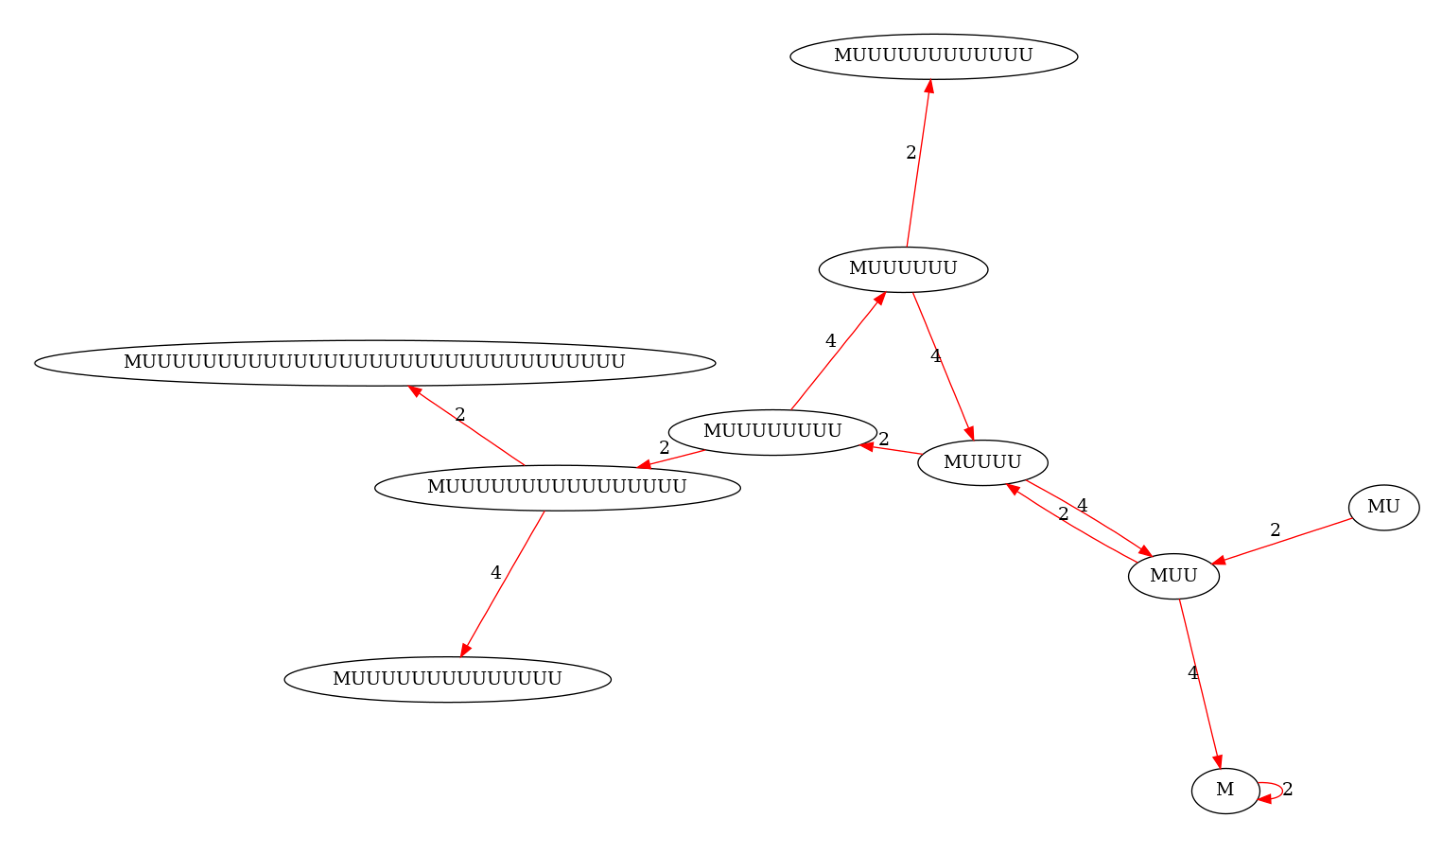

In [12]:
network2 = example2.discover_local_network(num_steps=5)
plot_network(network2, dpi=300)